In [1]:
import itertools
import sys
sys.path.append("../")
from pomps.policy_scope import PolicyComponent, MixedPolicyScope
from pomis.scm import *
import networkx as nx
from pomps.contextual_graphs import *
from pomps.policy_scope import *
from pomps.gp_fcm import *
from pomps.controllers import *
import pyro
import torch
from tqdm.auto import tqdm
import pyro.distributions as dist
from pomps.fcm import *
import seaborn as sns
import matplotlib.pyplot as plt
# from pomis.optimiser import CausalOptimiser, Objective, SCM
from pomis.scm import BoolDomain, SCM
from experiments.causal_bo_experiment import CaBOExperiment, OptimizationObjective

In [2]:
def sampler_over():
    return dict()

fcm = FunctionalCausalModel({Functor(lambda: pyro.sample("age", dist.Uniform(55, 76)), 'age'),
                            Functor(lambda: pyro.sample("bmi", dist.Normal(27, 0.7)), 'bmi'),
                            Functor(lambda age, bmi:   pyro.sample("aspirin",
                                                        dist.Delta(torch.sigmoid(-8.0 + 0.10 * age + 0.03 * bmi))), 'aspirin'),
                            Functor(lambda age, bmi:  pyro.sample("statin", dist.Delta(torch.sigmoid(-13.0 + 0.10 * age + 0.20 * bmi))), 
                                    'statin'),
                            Functor(lambda age, bmi, statin, aspirin: pyro.sample("cancer", 
                                                        dist.Delta(torch.sigmoid(2.2 - 0.05 * age + 0.01 * bmi - 0.04 * statin + 0.02 * aspirin))), 'cancer'),
                            Functor(lambda age, bmi, statin, aspirin, cancer: pyro.sample("Y", dist.Normal(6.8 + 0.04 * age - 0.15 * bmi - 0.60 * statin + 0.55 * aspirin + 1.00 * cancer, 0.4)), 'Y')},
                           sampler_over)

In [3]:
cabo = CaBOExperiment(fcm, {"age", "bmi", "cancer"}, 
                      [RealDomain("aspirin", 0, 1), RealDomain("statin", 0, 1)],
                      n_iter=1500, objetive=OptimizationObjective.minimize)

In [4]:
cabo.iterate()

  0%|          | 0/1500 [00:00<?, ?it/s]

None detected in acquisition function. Choosing 0
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.0} None
Sample is {'aspirin': 0.0, 'age': tensor(68.3276), 'bmi': tensor(27.2231), 'statin': tensor(0.3268), 'cancer': tensor(0.2774), 'Y': tensor(5.7359)}
None detected in acquisition function. Choosing 0
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.5} None
Sample is {'aspirin': 0.5, 'age': tensor(71.2218), 'bmi': tensor(27.5755), 'statin': tensor(0.4103), 'cancer': tensor(0.2513), 'Y': tensor(5.1872)}
None detected in acquisition function. Choosing 0
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.9992816290742076} [[ 4.96234035 -0.68295455 -0.68623966]]
Sample is {'aspirin': 0.9992816290742076, 'age': tensor(60.9107), 'bmi': tensor(27.7558), 'statin': tensor(0.2046), 'cancer': tensor(0.3644), 'Y': tensor(5.4383)}
None detected in acquisition function. Choosing 1
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.0} No

Inner  hebo {'statin': 0.5496263505795662} [[ 4.38163424 -0.86872047 -0.30086106]]
Sample is {'statin': 0.5496263505795662, 'age': tensor(55.4189), 'bmi': tensor(26.4473), 'aspirin': tensor(0.1591), 'cancer': tensor(0.4194), 'Y': tensor(5.4203)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8100424735184587} [[ 3.89326167 -3.71078181 -2.81239009]]
Sample is {'statin': 0.8100424735184587, 'age': tensor(70.1824), 'bmi': tensor(27.7043), 'aspirin': tensor(0.4624), 'cancer': tensor(0.2582), 'Y': tensor(5.8111)}
Optimal indexes [0 1 2]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.5812356471758551} [[ 3.64211082 -3.6490097  -2.7378056 ]]
Sample is {'aspirin': 0.5812356471758551, 'age': tensor(69.6586), 'bmi': tensor(26.7464), 'statin': tensor(0.3352), 'cancer': tensor(0.2656), 'Y': tensor(6.2094)}
Optimal indexes [0 1 2]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.5757297898369006} [[ 3.84530687  0.31501043 -0.0

Inner  hebo {'statin': 0.9857490040498342} [[ 3.41265607 -0.68893749 -0.50977957]]
Sample is {'statin': 0.9857490040498342, 'age': tensor(68.3055), 'bmi': tensor(27.2820), 'aspirin': tensor(0.4131), 'cancer': tensor(0.2742), 'Y': tensor(4.8118)}
Optimal indexes [0]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.14862521361192718} [[ 4.65152454  0.0713133  -0.07431278]]
Sample is {'aspirin': 0.14862521361192718, 'age': tensor(61.3574), 'bmi': tensor(26.5366), 'statin': tensor(0.1741), 'cancer': tensor(0.3529), 'Y': tensor(6.4498)}
Optimal indexes [0]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.11312720263955212} [[ 3.52534485 -2.32272625 -1.32918382]]
Sample is {'aspirin': 0.11312720263955212, 'age': tensor(71.2955), 'bmi': tensor(26.5424), 'statin': tensor(0.3631), 'cancer': tensor(0.2476), 'Y': tensor(5.6852)}
Optimal indexes [0 1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 0.8164734800639408, 'statin': 0.24735887437976928

Inner  hebo {'statin': 0.8169010995929584} [[ 5.08093452 -1.23127317 -0.86741763]]
Sample is {'statin': 0.8169010995929584, 'age': tensor(68.4577), 'bmi': tensor(25.9609), 'aspirin': tensor(0.4072), 'cancer': tensor(0.2713), 'Y': tensor(6.1899)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9975237702839224} [[ 6.03613091 -0.09727352 -0.11892463]]
Sample is {'statin': 0.9975237702839224, 'age': tensor(69.4711), 'bmi': tensor(28.1480), 'aspirin': tensor(0.4481), 'cancer': tensor(0.2644), 'Y': tensor(5.1663)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.6493091695807379} [[ 6.61942768 -0.87991488 -0.56840253]]
Sample is {'statin': 0.6493091695807379, 'age': tensor(59.5577), 'bmi': tensor(26.3998), 'aspirin': tensor(0.2223), 'cancer': tensor(0.3693), 'Y': tensor(4.7072)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.07026654821233402} [[ 5.58032751 -2.00416827 -1.43109655]]
S

Inner  hebo {'statin': 0.6375773094300632} [[ 8.80990314  0.12239706 -0.10224767]]
Sample is {'statin': 0.6375773094300632, 'age': tensor(64.1066), 'bmi': tensor(26.9625), 'aspirin': tensor(0.3142), 'cancer': tensor(0.3197), 'Y': tensor(6.0613)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8683546194958788} [[ 5.40278864e+00  9.53371346e-01 -2.13086978e-03]]
Sample is {'statin': 0.8683546194958788, 'age': tensor(60.5992), 'bmi': tensor(26.5489), 'aspirin': tensor(0.2417), 'cancer': tensor(0.3556), 'Y': tensor(5.8884)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9979605432006765} [[ 7.06622458 -2.71083045 -1.80088151]]
Sample is {'statin': 0.9979605432006765, 'age': tensor(65.4158), 'bmi': tensor(26.9452), 'aspirin': tensor(0.3430), 'cancer': tensor(0.3027), 'Y': tensor(4.6103)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9978889650543779} [[ 5.83831596 -0.36635453 -0.1

Inner  hebo {'statin': 0.46239033136425567} [[ 6.26639080e+00  1.00778496e+00 -4.87923418e-04]]
Sample is {'statin': 0.46239033136425567, 'age': tensor(73.7040), 'bmi': tensor(28.5441), 'aspirin': tensor(0.5564), 'cancer': tensor(0.2302), 'Y': tensor(5.8245)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.7744139125996912} [[ 5.85567284e+00  1.34398866e+00 -2.02655997e-06]]
Sample is {'statin': 0.7744139125996912, 'age': tensor(72.8836), 'bmi': tensor(26.4799), 'aspirin': tensor(0.5207), 'cancer': tensor(0.2315), 'Y': tensor(5.2061)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.2461434262126433} [[ 4.34837723e+00  1.15831029e+00 -2.09711128e-04]]
Sample is {'statin': 0.2461434262126433, 'age': tensor(70.9212), 'bmi': tensor(27.3987), 'aspirin': tensor(0.4785), 'cancer': tensor(0.2550), 'Y': tensor(5.6609)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9856594821701641} [[ 7

Inner  hebo {'statin': 0.8214179153689541} [[ 6.42407322e+00  1.32825744e+00 -4.05312403e-06]]
Sample is {'statin': 0.8214179153689541, 'age': tensor(73.8760), 'bmi': tensor(27.6649), 'aspirin': tensor(0.5542), 'cancer': tensor(0.2246), 'Y': tensor(5.2374)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.7804942650844462} [[ 6.83434772  0.36547273 -0.05001977]]
Sample is {'statin': 0.7804942650844462, 'age': tensor(72.1290), 'bmi': tensor(27.6937), 'aspirin': tensor(0.5109), 'cancer': tensor(0.2404), 'Y': tensor(5.9106)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 0.4729873415242961, 'statin': 0.4699686646619342} [[ 4.59619522e+00  6.84411287e-01 -1.59939809e-03]]
Sample is {'statin': 0.4699686646619342, 'aspirin': 0.4729873415242961, 'age': tensor(65.9920), 'bmi': tensor(26.6935), 'cancer': tensor(0.3011), 'Y': tensor(6.1507)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin':

Inner  hebo {'statin': 0.9735076188326321} [[ 7.49170494  0.37470856 -0.0470505 ]]
Sample is {'statin': 0.9735076188326321, 'age': tensor(68.9394), 'bmi': tensor(26.8173), 'aspirin': tensor(0.4252), 'cancer': tensor(0.2671), 'Y': tensor(5.6332)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9988677714148952} [[ 8.70616531 -4.77352285 -3.65047669]]
Sample is {'statin': 0.9988677714148952, 'age': tensor(71.7748), 'bmi': tensor(29.1106), 'aspirin': tensor(0.5127), 'cancer': tensor(0.2447), 'Y': tensor(4.8996)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 0.0008386531976195266, 'statin': 0.8603602037958068} [[ 4.94968557e+00  9.67052758e-01 -5.20362082e-05]]
Sample is {'statin': 0.8603602037958068, 'aspirin': 0.0008386531976195266, 'age': tensor(55.0785), 'bmi': tensor(26.4168), 'cancer': tensor(0.4197), 'Y': tensor(4.5777)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 0.09

Inner  hebo {'statin': 0.9441173316104097} [[ 3.74366140e+00  1.42601216e+00 -5.96046618e-07]]
Sample is {'statin': 0.9441173316104097, 'age': tensor(64.0605), 'bmi': tensor(27.8690), 'aspirin': tensor(0.3191), 'cancer': tensor(0.3196), 'Y': tensor(4.1546)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 0.03498727257241494, 'statin': 0.9029071816494625} [[ 5.14387226e+00  8.25730860e-01 -5.91295575e-05]]
Sample is {'statin': 0.9029071816494625, 'aspirin': 0.03498727257241494, 'age': tensor(62.5084), 'bmi': tensor(27.0349), 'cancer': tensor(0.3339), 'Y': tensor(4.3184)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 0.0058969190631580105, 'statin': 0.8281775733275377} [[ 5.9737587  -0.06822656 -0.05920792]]
Sample is {'statin': 0.8281775733275377, 'aspirin': 0.0058969190631580105, 'age': tensor(64.0856), 'bmi': tensor(27.6529), 'cancer': tensor(0.3185), 'Y': tensor(4.7683)}
Optimal indexes [1 2]
Policy for stati

Inner  hebo {'statin': 0.7928008284816246} [[ 5.96028137e+00  1.38619626e+00 -2.38418875e-06]]
Sample is {'statin': 0.7928008284816246, 'age': tensor(70.4823), 'bmi': tensor(26.6424), 'aspirin': tensor(0.4619), 'cancer': tensor(0.2535), 'Y': tensor(5.8038)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.6763824721002436} [[ 8.62436676 -2.74057865 -1.93896973]]
Sample is {'statin': 0.6763824721002436, 'age': tensor(67.6444), 'bmi': tensor(27.4522), 'aspirin': tensor(0.3984), 'cancer': tensor(0.2836), 'Y': tensor(5.6880)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9995697329418629} [[1.84552693 1.68870735 0.        ]]
Sample is {'statin': 0.9995697329418629, 'age': tensor(75.8997), 'bmi': tensor(27.3676), 'aspirin': tensor(0.6013), 'cancer': tensor(0.2060), 'Y': tensor(6.2298)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.8710816065955895} [[ 5.76582813 -4.01428413 -

Inner  hebo {'statin': 0.8993394096192203} [[ 7.55507183  0.45673731 -0.04027064]]
Sample is {'statin': 0.8993394096192203, 'age': tensor(72.6186), 'bmi': tensor(26.1624), 'aspirin': tensor(0.5117), 'cancer': tensor(0.2324), 'Y': tensor(5.1537)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9667033495902307} [[ 4.57215834e+00  1.42832994e+00 -1.43051250e-06]]
Sample is {'statin': 0.9667033495902307, 'age': tensor(69.8987), 'bmi': tensor(27.3744), 'aspirin': tensor(0.4529), 'cancer': tensor(0.2591), 'Y': tensor(5.1413)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.06928877287921376} [[ 5.03208256 -0.32627788 -0.32135934]]
Sample is {'aspirin': 0.06928877287921376, 'age': tensor(71.7168), 'bmi': tensor(25.7179), 'statin': tensor(0.3352), 'cancer': tensor(0.2422), 'Y': tensor(5.1202)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.4677982365947786} [[ 4.88520765 -0.012

Inner  hebo {'aspirin': 0.00029490823269692095, 'statin': 0.9986880037359579} [[ 4.28926373 -2.47976589 -1.62621903]]
Sample is {'statin': 0.9986880037359579, 'aspirin': 0.00029490823269692095, 'age': tensor(57.9715), 'bmi': tensor(26.6968), 'cancer': tensor(0.3842), 'Y': tensor(4.7640)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8474727116648121} [[ 4.09768486e+00  1.53760040e+00 -1.19209290e-07]]
Sample is {'statin': 0.8474727116648121, 'age': tensor(59.3592), 'bmi': tensor(27.3687), 'aspirin': tensor(0.2239), 'cancer': tensor(0.3720), 'Y': tensor(4.8540)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8328653644734051} [[ 9.22348022 -1.74908721 -1.19207323]]
Sample is {'statin': 0.8328653644734051, 'age': tensor(55.4091), 'bmi': tensor(27.8594), 'aspirin': tensor(0.1647), 'cancer': tensor(0.4202), 'Y': tensor(5.7405)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0

Inner  hebo {'statin': 0.9021354766157409} [[ 7.13288498e+00  1.13202250e+00 -3.17862490e-04]]
Sample is {'statin': 0.9021354766157409, 'age': tensor(57.6627), 'bmi': tensor(26.1095), 'aspirin': tensor(0.1899), 'cancer': tensor(0.3883), 'Y': tensor(5.6907)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9132090753161423} [[ 8.36662865e+00  1.00491619e+00 -1.32547203e-03]]
Sample is {'statin': 0.9132090753161423, 'age': tensor(71.1947), 'bmi': tensor(26.3713), 'aspirin': tensor(0.4777), 'cancer': tensor(0.2455), 'Y': tensor(6.2812)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9544886101524711} [[ 8.41469669 -0.11186018 -0.21091303]]
Sample is {'statin': 0.9544886101524711, 'age': tensor(64.6572), 'bmi': tensor(26.4486), 'aspirin': tensor(0.3228), 'cancer': tensor(0.3100), 'Y': tensor(4.9139)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9772099320945918} [[ 8.85742474 -2.1

Inner  hebo {'statin': 0.9519106624326746} [[ 7.70442104e+00  1.19195032e+00 -1.56593669e-04]]
Sample is {'statin': 0.9519106624326746, 'age': tensor(59.0259), 'bmi': tensor(27.6505), 'aspirin': tensor(0.2196), 'cancer': tensor(0.3756), 'Y': tensor(4.5386)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8833433476193404} [[ 4.96852875e+00  1.41872513e+00 -2.98023679e-06]]
Sample is {'statin': 0.8833433476193404, 'age': tensor(71.5937), 'bmi': tensor(26.5277), 'aspirin': tensor(0.4888), 'cancer': tensor(0.2423), 'Y': tensor(5.3898)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8860126376578717} [[ 7.81396580e+00  1.03560793e+00 -1.01993815e-03]]
Sample is {'statin': 0.8860126376578717, 'age': tensor(62.2375), 'bmi': tensor(25.6502), 'aspirin': tensor(0.2676), 'cancer': tensor(0.3350), 'Y': tensor(5.0531)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.899102393504947} [[ 7.

Inner  hebo {'aspirin': 0.042405351213104014} [[ 3.47901607e+00  1.11083078e+00 -9.71560439e-06]]
Sample is {'aspirin': 0.042405351213104014, 'age': tensor(74.0669), 'bmi': tensor(27.3607), 'statin': tensor(0.4697), 'cancer': tensor(0.2231), 'Y': tensor(6.4278)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9889311982012579} [[ 4.45364237e+00  1.39796090e+00 -5.36443258e-06]]
Sample is {'statin': 0.9889311982012579, 'age': tensor(63.6199), 'bmi': tensor(27.4144), 'aspirin': tensor(0.3067), 'cancer': tensor(0.3229), 'Y': tensor(5.0169)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9620398226548006} [[ 8.85714817  0.62558484 -0.02158879]]
Sample is {'statin': 0.9620398226548006, 'age': tensor(58.4565), 'bmi': tensor(27.3628), 'aspirin': tensor(0.2086), 'cancer': tensor(0.3814), 'Y': tensor(4.2863)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8798006464555985} [[ 8.8527

Inner  hebo {'aspirin': 0.009962624692743415} [[ 4.68947268e+00  1.39273047e+00 -5.96046448e-08]]
Sample is {'aspirin': 0.009962624692743415, 'age': tensor(62.2410), 'bmi': tensor(26.4654), 'statin': tensor(0.1850), 'cancer': tensor(0.3420), 'Y': tensor(5.5605)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.009097861210874292} [[ 7.17386913  0.07896873 -0.08604551]]
Sample is {'aspirin': 0.009097861210874292, 'age': tensor(74.4221), 'bmi': tensor(26.3231), 'statin': tensor(0.4272), 'cancer': tensor(0.2184), 'Y': tensor(5.4903)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.9339585539497453} [[ 6.95607853 -4.58872843 -3.72424817]]
Sample is {'aspirin': 0.9339585539497453, 'age': tensor(64.7302), 'bmi': tensor(26.5475), 'statin': tensor(0.2284), 'cancer': tensor(0.3183), 'Y': tensor(6.4879)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.0010270280733339215} [[ 5.6

Inner  hebo {'statin': 0.9366630020602933} [[ 8.56124306 -2.63734746 -1.89968109]]
Sample is {'statin': 0.9366630020602933, 'age': tensor(70.9804), 'bmi': tensor(26.6994), 'aspirin': tensor(0.4748), 'cancer': tensor(0.2479), 'Y': tensor(6.1899)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.019162367977091352} [[ 7.32255363  0.02073166 -0.10440077]]
Sample is {'aspirin': 0.019162367977091352, 'age': tensor(57.2714), 'bmi': tensor(26.8725), 'statin': tensor(0.1303), 'cancer': tensor(0.4014), 'Y': tensor(5.9149)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9497100836118367} [[ 7.61545753e+00  9.53828394e-01 -2.51537748e-03]]
Sample is {'statin': 0.9497100836118367, 'age': tensor(73.9042), 'bmi': tensor(27.9566), 'aspirin': tensor(0.5570), 'cancer': tensor(0.2240), 'Y': tensor(5.1030)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9419509346049525} [[ 8.05228424e+00  1

Inner  hebo {'aspirin': 0.006522415621116218} [[ 6.31860542e+00  9.38791037e-01 -6.30219642e-04]]
Sample is {'aspirin': 0.006522415621116218, 'age': tensor(72.9344), 'bmi': tensor(25.7517), 'statin': tensor(0.3644), 'cancer': tensor(0.2308), 'Y': tensor(5.4110)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.03412893024045188} [[ 8.07767105 -3.47460032 -2.45693898]]
Sample is {'aspirin': 0.03412893024045188, 'age': tensor(71.0091), 'bmi': tensor(26.3321), 'statin': tensor(0.3469), 'cancer': tensor(0.2497), 'Y': tensor(5.9696)}
Optimal indexes [0 1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 4.144367683056679e-05, 'statin': 0.9996765223968035} [[ 4.36140728 -2.80054283 -1.87644708]]
Sample is {'statin': 0.9996765223968035, 'aspirin': 4.144367683056679e-05, 'age': tensor(60.8074), 'bmi': tensor(27.4121), 'cancer': tensor(0.3529), 'Y': tensor(4.5254)}
Optimal indexes [0 1 2]
Policy for aspirin, set()
Trial index 0
Inner  hebo 

Inner  hebo {'aspirin': 0.016818998811202173} [[ 6.4276557  -1.89275026 -1.14375412]]
Sample is {'aspirin': 0.016818998811202173, 'age': tensor(70.2761), 'bmi': tensor(26.4331), 'statin': tensor(0.3350), 'cancer': tensor(0.2568), 'Y': tensor(4.5180)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9998452748898886} [[4.48905993 1.68142617 0.        ]]
Sample is {'statin': 0.9998452748898886, 'age': tensor(73.7675), 'bmi': tensor(26.1200), 'aspirin': tensor(0.5400), 'cancer': tensor(0.2216), 'Y': tensor(5.2939)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.0038793139560056936} [[ 6.48985195e+00  9.80723798e-01 -4.00384946e-04]]
Sample is {'aspirin': 0.0038793139560056936, 'age': tensor(59.1039), 'bmi': tensor(27.2966), 'statin': tensor(0.1638), 'cancer': tensor(0.3802), 'Y': tensor(5.9480)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9800680452413209} [[ 5.00597334e

Inner  hebo {'aspirin': 0.06367770411743456} [[ 3.31674004e+00  1.16896033e+00 -5.25130708e-05]]
Sample is {'aspirin': 0.06367770411743456, 'age': tensor(68.2518), 'bmi': tensor(26.7600), 'statin': tensor(0.3052), 'cancer': tensor(0.2777), 'Y': tensor(5.6723)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9012989382047322} [[ 7.03920841e+00  1.28016543e+00 -5.98448532e-05]]
Sample is {'statin': 0.9012989382047322, 'age': tensor(57.0030), 'bmi': tensor(27.1309), 'aspirin': tensor(0.1846), 'cancer': tensor(0.3986), 'Y': tensor(4.9753)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9092013365653352} [[ 9.30186939e+00  1.27646196e+00 -6.34213502e-05]]
Sample is {'statin': 0.9092013365653352, 'age': tensor(60.6797), 'bmi': tensor(25.2694), 'aspirin': tensor(0.2361), 'cancer': tensor(0.3514), 'Y': tensor(4.9013)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.041932484125646

Inner  hebo {'statin': 0.9234849990991453} [[ 6.72338247e+00  1.43631077e+00 -3.63588993e-06]]
Sample is {'statin': 0.9234849990991453, 'age': tensor(55.9945), 'bmi': tensor(27.1213), 'aspirin': tensor(0.1698), 'cancer': tensor(0.4105), 'Y': tensor(5.0879)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9749593840706734} [[2.83090258 1.67293036 0.        ]]
Sample is {'statin': 0.9749593840706734, 'age': tensor(59.3106), 'bmi': tensor(26.8831), 'aspirin': tensor(0.2206), 'cancer': tensor(0.3702), 'Y': tensor(5.3502)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9599718540005124} [[ 6.89239407e+00  1.37567437e+00 -1.21594212e-05]]
Sample is {'statin': 0.9599718540005124, 'age': tensor(71.8265), 'bmi': tensor(25.5789), 'aspirin': tensor(0.4875), 'cancer': tensor(0.2379), 'Y': tensor(6.2880)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.7442625134957159} [[ 9.10392952 -2.33

Inner  hebo {'aspirin': 0.07805130627007831} [[ 7.31050825e+00  8.87923360e-01 -1.54877373e-03]]
Sample is {'aspirin': 0.07805130627007831, 'age': tensor(55.6132), 'bmi': tensor(26.6038), 'statin': tensor(0.1074), 'cancer': tensor(0.4213), 'Y': tensor(5.1742)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.21747814628660944} [[ 6.28043509 -2.78528643 -2.07847476]]
Sample is {'statin': 0.21747814628660944, 'age': tensor(67.7447), 'bmi': tensor(27.3014), 'aspirin': tensor(0.3998), 'cancer': tensor(0.2860), 'Y': tensor(5.6730)}
Optimal indexes [0]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.07473192108042519} [[ 6.08344650e+00  1.15710676e+00 -6.03217195e-05]]
Sample is {'aspirin': 0.07473192108042519, 'age': tensor(74.8848), 'bmi': tensor(26.3930), 'statin': tensor(0.4420), 'cancer': tensor(0.2148), 'Y': tensor(6.4656)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.6371109492711375} [[ 3.

Inner  hebo {'statin': 0.9741253560311122} [[ 7.81143188e+00  1.25131404e+00 -1.05863452e-04]]
Sample is {'statin': 0.9741253560311122, 'age': tensor(75.4295), 'bmi': tensor(27.5892), 'aspirin': tensor(0.5916), 'cancer': tensor(0.2104), 'Y': tensor(5.8387)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.05623741926400317} [[ 4.32009506e+00  1.29122269e+00 -7.45060834e-06]]
Sample is {'aspirin': 0.05623741926400317, 'age': tensor(61.5265), 'bmi': tensor(26.8675), 'statin': tensor(0.1864), 'cancer': tensor(0.3512), 'Y': tensor(5.7360)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.07525357437279795} [[ 7.95335007 -0.5653581  -0.37960869]]
Sample is {'aspirin': 0.07525357437279795, 'age': tensor(58.4823), 'bmi': tensor(26.4569), 'statin': tensor(0.1347), 'cancer': tensor(0.3862), 'Y': tensor(5.5789)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9989683015931936} [[ 8

Inner  hebo {'statin': 0.6128227294791144} [[10.24325371 -1.30634594 -0.91236734]]
Sample is {'statin': 0.6128227294791144, 'age': tensor(75.5432), 'bmi': tensor(26.5370), 'aspirin': tensor(0.5867), 'cancer': tensor(0.2101), 'Y': tensor(5.5260)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.0063505747132333035} [[ 7.05811214e+00  9.38641250e-01 -1.11534784e-03]]
Sample is {'aspirin': 0.0063505747132333035, 'age': tensor(71.5566), 'bmi': tensor(25.8388), 'statin': tensor(0.3370), 'cancer': tensor(0.2436), 'Y': tensor(5.7256)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9717442993374533} [[ 7.92660952e+00  1.04560733e+00 -1.29282568e-03]]
Sample is {'statin': 0.9717442993374533, 'age': tensor(56.5127), 'bmi': tensor(26.4329), 'aspirin': tensor(0.1743), 'cancer': tensor(0.4021), 'Y': tensor(4.3076)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9974570811324187} [[ 6

Inner  hebo {'aspirin': 0.00037164213412343994} [[ 5.46997881e+00  1.45591295e+00 -2.38418608e-07]]
Sample is {'aspirin': 0.00037164213412343994, 'age': tensor(56.3888), 'bmi': tensor(26.4429), 'statin': tensor(0.1118), 'cancer': tensor(0.4111), 'Y': tensor(5.4757)}
Optimal indexes [0 1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 0.1304001006039921, 'statin': 0.9982756385017307} [[ 6.30097961 -2.23904419 -1.32028675]]
Sample is {'statin': 0.9982756385017307, 'aspirin': 0.1304001006039921, 'age': tensor(66.6969), 'bmi': tensor(27.5732), 'cancer': tensor(0.2898), 'Y': tensor(4.2214)}
Optimal indexes [0 1 2]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.06053112913593407} [[ 7.29934502  0.40803799 -0.04068314]]
Sample is {'aspirin': 0.06053112913593407, 'age': tensor(59.6936), 'bmi': tensor(26.4590), 'statin': tensor(0.1495), 'cancer': tensor(0.3717), 'Y': tensor(4.9616)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'s

Inner  hebo {'aspirin': 0.005368285931240099} [[ 7.36533737e+00  7.66961277e-01 -5.76497661e-03]]
Sample is {'aspirin': 0.005368285931240099, 'age': tensor(64.4586), 'bmi': tensor(26.1796), 'statin': tensor(0.2111), 'cancer': tensor(0.3166), 'Y': tensor(6.2214)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9859102466395092} [[ 8.92004204 -0.2528244  -0.29128805]]
Sample is {'statin': 0.9859102466395092, 'age': tensor(70.4886), 'bmi': tensor(26.4799), 'aspirin': tensor(0.4609), 'cancer': tensor(0.2516), 'Y': tensor(5.0099)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.7994491548892038} [[ 3.09794426e+00  1.62021184e+00 -5.96046448e-08]]
Sample is {'statin': 0.7994491548892038, 'age': tensor(67.2196), 'bmi': tensor(28.3887), 'aspirin': tensor(0.3950), 'cancer': tensor(0.2888), 'Y': tensor(5.4296)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9020929609732937} [[ 5.0744

Inner  hebo {'aspirin': 0.006465332618601605} [[ 8.00763035 -5.53605413 -4.32804775]]
Sample is {'aspirin': 0.006465332618601605, 'age': tensor(63.4779), 'bmi': tensor(28.0060), 'statin': tensor(0.2590), 'cancer': tensor(0.3309), 'Y': tensor(5.0758)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 0.10057170623056315, 'statin': 0.9982435829544143} [[ 5.96700573  0.23722234 -0.02552505]]
Sample is {'statin': 0.9982435829544143, 'aspirin': 0.10057170623056315, 'age': tensor(63.1144), 'bmi': tensor(26.1819), 'cancer': tensor(0.3248), 'Y': tensor(5.3896)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.20010341354182312} [[ 3.53973866e+00  1.54622436e+00 -4.76837272e-07]]
Sample is {'statin': 0.20010341354182312, 'age': tensor(56.4782), 'bmi': tensor(27.9559), 'aspirin': tensor(0.1804), 'cancer': tensor(0.4137), 'Y': tensor(5.3851)}
Optimal indexes [0 1 2]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspiri

Inner  hebo {'statin': 0.7009284179519648} [[ 7.82353067  0.78404856 -0.01091768]]
Sample is {'statin': 0.7009284179519648, 'age': tensor(58.5464), 'bmi': tensor(26.8075), 'aspirin': tensor(0.2073), 'cancer': tensor(0.3815), 'Y': tensor(5.1849)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.09314034619192255} [[ 6.65354919e+00  1.10855997e+00 -2.36062260e-04]]
Sample is {'aspirin': 0.09314034619192255, 'age': tensor(63.4842), 'bmi': tensor(26.8493), 'statin': tensor(0.2173), 'cancer': tensor(0.3290), 'Y': tensor(5.6245)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.19245045730855564} [[ 8.42587852  0.45092165 -0.03767637]]
Sample is {'aspirin': 0.19245045730855564, 'age': tensor(62.4787), 'bmi': tensor(26.8704), 'statin': tensor(0.2013), 'cancer': tensor(0.3409), 'Y': tensor(5.1977)}
Optimal indexes [0 1 2]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8285489232802811} [[ 7.40133047e

Inner  hebo {'aspirin': 0.006773878553535808} [[ 7.45892525  0.60000306 -0.01900146]]
Sample is {'aspirin': 0.006773878553535808, 'age': tensor(73.4807), 'bmi': tensor(26.1481), 'statin': tensor(0.3960), 'cancer': tensor(0.2265), 'Y': tensor(6.3405)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.04715373340873252} [[ 6.29679680e+00  1.33336163e+00 -7.33139814e-06]]
Sample is {'aspirin': 0.04715373340873252, 'age': tensor(67.1910), 'bmi': tensor(26.0448), 'statin': tensor(0.2550), 'cancer': tensor(0.2873), 'Y': tensor(5.3945)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.00180925164568627} [[ 6.19897461e+00  1.25204921e+00 -3.30215189e-05]]
Sample is {'aspirin': 0.00180925164568627, 'age': tensor(66.9862), 'bmi': tensor(27.7010), 'statin': tensor(0.3184), 'cancer': tensor(0.2921), 'Y': tensor(4.8281)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.147124936279950

Inner  hebo {'statin': 0.9782983687844886} [[ 4.75745869e+00  1.47980404e+00 -2.14576949e-06]]
Sample is {'statin': 0.9782983687844886, 'age': tensor(71.2433), 'bmi': tensor(27.2203), 'aspirin': tensor(0.4852), 'cancer': tensor(0.2461), 'Y': tensor(5.4123)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.7234028987051123} [[ 8.73808861e+00  9.48355198e-01 -3.44535476e-03]]
Sample is {'statin': 0.7234028987051123, 'age': tensor(57.4561), 'bmi': tensor(26.1961), 'aspirin': tensor(0.1872), 'cancer': tensor(0.3927), 'Y': tensor(4.6157)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.1152533197277909} [[ 5.25493336e+00  1.23924959e+00 -4.37507661e-05]]
Sample is {'aspirin': 0.1152533197277909, 'age': tensor(73.7403), 'bmi': tensor(27.3426), 'statin': tensor(0.4607), 'cancer': tensor(0.2262), 'Y': tensor(6.0198)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.06049147492518

Inner  hebo {'aspirin': 0.20044854020201738, 'statin': 0.9167802162451474} [[ 1.49584436e+00  1.16602015e+00 -4.76837272e-07]]
Sample is {'statin': 0.9167802162451474, 'aspirin': 0.20044854020201738, 'age': tensor(56.9048), 'bmi': tensor(27.1233), 'cancer': tensor(0.3997), 'Y': tensor(5.1000)}
Optimal indexes [0 1 2]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.0903986717903756} [[ 8.92602921 -0.22830661 -0.24765125]]
Sample is {'aspirin': 0.0903986717903756, 'age': tensor(68.7992), 'bmi': tensor(28.0546), 'statin': tensor(0.3754), 'cancer': tensor(0.2744), 'Y': tensor(5.5846)}
Optimal indexes [0 1 2]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.00884716740790862} [[3.14954209 1.60207272 0.        ]]
Sample is {'aspirin': 0.00884716740790862, 'age': tensor(65.8660), 'bmi': tensor(27.1577), 'statin': tensor(0.2725), 'cancer': tensor(0.3031), 'Y': tensor(5.9824)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin'

Inner  hebo {'statin': 0.6543676983447548} [[ 5.99153471e+00  1.52943528e+00 -6.55651320e-07]]
Sample is {'statin': 0.6543676983447548, 'age': tensor(72.1249), 'bmi': tensor(27.1920), 'aspirin': tensor(0.5071), 'cancer': tensor(0.2404), 'Y': tensor(5.3273)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.0072321587668652265} [[ 8.85549927e+00  1.26897788e+00 -2.97431598e-05]]
Sample is {'aspirin': 0.0072321587668652265, 'age': tensor(66.7798), 'bmi': tensor(27.3737), 'statin': tensor(0.3000), 'cancer': tensor(0.2938), 'Y': tensor(6.1386)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.0025809791186269804} [[ 6.90791035e+00  1.20858467e+00 -8.10059937e-05]]
Sample is {'aspirin': 0.0025809791186269804, 'age': tensor(74.4182), 'bmi': tensor(28.3057), 'statin': tensor(0.5257), 'cancer': tensor(0.2212), 'Y': tensor(5.1342)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.

Inner  hebo {'aspirin': 0.05357881933913232} [[ 8.30846500e+00  1.08769500e+00 -4.19943273e-04]]
Sample is {'aspirin': 0.05357881933913232, 'age': tensor(67.6674), 'bmi': tensor(26.6730), 'statin': tensor(0.2893), 'cancer': tensor(0.2835), 'Y': tensor(5.5844)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9742756768928924} [[ 7.32093763e+00  1.59656572e+00 -1.19209290e-07]]
Sample is {'statin': 0.9742756768928924, 'age': tensor(60.6688), 'bmi': tensor(26.7900), 'aspirin': tensor(0.2443), 'cancer': tensor(0.3544), 'Y': tensor(4.7231)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.015525286872647315} [[ 6.13324499e+00  1.52476799e+00 -1.19209290e-07]]
Sample is {'aspirin': 0.015525286872647315, 'age': tensor(61.2346), 'bmi': tensor(27.0423), 'statin': tensor(0.1872), 'cancer': tensor(0.3547), 'Y': tensor(4.8831)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.1575786

Inner  hebo {'statin': 0.9592879787337846} [[ 7.60342550e+00  1.21687222e+00 -2.05061006e-04]]
Sample is {'statin': 0.9592879787337846, 'age': tensor(56.2747), 'bmi': tensor(26.8777), 'aspirin': tensor(0.1728), 'cancer': tensor(0.4062), 'Y': tensor(4.5606)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8492568655017197} [[5.42919683 1.64373088 0.        ]]
Sample is {'statin': 0.8492568655017197, 'age': tensor(68.9455), 'bmi': tensor(27.1500), 'aspirin': tensor(0.4278), 'cancer': tensor(0.2687), 'Y': tensor(5.5209)}
Optimal indexes [0 1 2]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.4965443914691299} [[ 4.20435667e+00  1.57884347e+00 -2.38418608e-07]]
Sample is {'statin': 0.4965443914691299, 'age': tensor(60.5378), 'bmi': tensor(26.7183), 'aspirin': tensor(0.2415), 'cancer': tensor(0.3601), 'Y': tensor(5.9433)}
Optimal indexes [0 1 2]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.026666036364761864} [[ 6.86

Inner  hebo {'statin': 0.9597195829240471} [[ 8.32329845e+00  1.12347353e+00 -6.52406772e-04]]
Sample is {'statin': 0.9597195829240471, 'age': tensor(74.6227), 'bmi': tensor(25.6187), 'aspirin': tensor(0.5575), 'cancer': tensor(0.2138), 'Y': tensor(5.7798)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9131114539780043} [[ 6.90192318e+00  1.59596050e+00 -1.19209290e-07]]
Sample is {'statin': 0.9131114539780043, 'age': tensor(68.6879), 'bmi': tensor(26.8708), 'aspirin': tensor(0.4194), 'cancer': tensor(0.2702), 'Y': tensor(4.4482)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.18285432933931645} [[ 7.83446217e+00  8.49196792e-01 -4.50198445e-03]]
Sample is {'aspirin': 0.18285432933931645, 'age': tensor(61.5179), 'bmi': tensor(27.8690), 'statin': tensor(0.2185), 'cancer': tensor(0.3538), 'Y': tensor(5.7307)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.075505955581

Inner  hebo {'aspirin': 0.017361266099316534} [[5.21785831 1.66153002 0.        ]]
Sample is {'aspirin': 0.017361266099316534, 'age': tensor(71.0098), 'bmi': tensor(25.9501), 'statin': tensor(0.3298), 'cancer': tensor(0.2490), 'Y': tensor(5.7947)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.3002037883029744} [[ 8.61059761  0.80274606 -0.01028733]]
Sample is {'statin': 0.3002037883029744, 'age': tensor(63.6763), 'bmi': tensor(26.7503), 'aspirin': tensor(0.3037), 'cancer': tensor(0.3269), 'Y': tensor(5.1641)}
Optimal indexes [0 1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 0.07914304061720989, 'statin': 0.9640570936489475} [[ 5.39857721e+00  7.93988228e-01 -4.55781352e-04]]
Sample is {'statin': 0.9640570936489475, 'aspirin': 0.07914304061720989, 'age': tensor(55.4042), 'bmi': tensor(26.8895), 'cancer': tensor(0.4162), 'Y': tensor(4.8650)}
Optimal indexes [0 1 2]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin':

Inner  hebo {'aspirin': 0.08436773837081629} [[ 7.95718431  0.41244644 -0.04944745]]
Sample is {'aspirin': 0.08436773837081629, 'age': tensor(68.3612), 'bmi': tensor(27.3463), 'statin': tensor(0.3330), 'cancer': tensor(0.2776), 'Y': tensor(5.7287)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.035082521548718236} [[4.32537889 1.60577214 0.        ]]
Sample is {'aspirin': 0.035082521548718236, 'age': tensor(72.7048), 'bmi': tensor(27.9642), 'statin': tensor(0.4659), 'cancer': tensor(0.2362), 'Y': tensor(5.9276)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.007476057791156399} [[ 5.00548410e+00  1.36232185e+00 -6.97376754e-06]]
Sample is {'aspirin': 0.007476057791156399, 'age': tensor(59.7600), 'bmi': tensor(26.4364), 'statin': tensor(0.1497), 'cancer': tensor(0.3706), 'Y': tensor(5.5126)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8084806117320006} [[ 8.2011585

Inner  hebo {'statin': 0.969453057563476} [[ 5.96661997e+00  1.58596873e+00 -1.78813949e-07]]
Sample is {'statin': 0.969453057563476, 'age': tensor(57.9647), 'bmi': tensor(27.6815), 'aspirin': tensor(0.2021), 'cancer': tensor(0.3879), 'Y': tensor(4.7983)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9363036093626476} [[ 8.04955196e+00  1.16172194e+00 -4.16365510e-04]]
Sample is {'statin': 0.9363036093626476, 'age': tensor(74.1496), 'bmi': tensor(26.7153), 'aspirin': tensor(0.5539), 'cancer': tensor(0.2198), 'Y': tensor(5.3078)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8965557777038191} [[ 6.67278767e+00  1.49256444e+00 -1.66893142e-06]]
Sample is {'statin': 0.8965557777038191, 'age': tensor(57.7725), 'bmi': tensor(27.3157), 'aspirin': tensor(0.1973), 'cancer': tensor(0.3900), 'Y': tensor(5.1084)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.05266974710708705} [

Inner  hebo {'statin': 0.8065171569649118} [[ 6.37255955e+00  1.28591692e+00 -7.82043498e-05]]
Sample is {'statin': 0.8065171569649118, 'age': tensor(55.6195), 'bmi': tensor(25.9186), 'aspirin': tensor(0.1597), 'cancer': tensor(0.4132), 'Y': tensor(5.1789)}
Optimal indexes [0 1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 0.0443610634008179, 'statin': 0.9667865306906029} [[ 5.01574183e+00  7.96491921e-01 -6.48947491e-04]]
Sample is {'statin': 0.9667865306906029, 'aspirin': 0.0443610634008179, 'age': tensor(75.8791), 'bmi': tensor(26.5592), 'cancer': tensor(0.2032), 'Y': tensor(6.0998)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9172811991934193} [[6.44600916 1.84886336 0.        ]]
Sample is {'statin': 0.9172811991934193, 'age': tensor(59.9637), 'bmi': tensor(26.7651), 'aspirin': tensor(0.2314), 'cancer': tensor(0.3629), 'Y': tensor(5.3446)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspiri

Inner  hebo {'aspirin': 0.024010656650884463} [[ 9.01285744 -3.14114499 -2.29530096]]
Sample is {'aspirin': 0.024010656650884463, 'age': tensor(73.0060), 'bmi': tensor(28.0941), 'statin': tensor(0.4799), 'cancer': tensor(0.2336), 'Y': tensor(5.1678)}
Optimal indexes [0 1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'aspirin': 0.0021052858391187174, 'statin': 0.6744563331215709} [[ 8.16260147 -0.41882831 -0.31650585]]
Sample is {'statin': 0.6744563331215709, 'aspirin': 0.0021052858391187174, 'age': tensor(67.7032), 'bmi': tensor(26.5926), 'cancer': tensor(0.2797), 'Y': tensor(5.5037)}
Optimal indexes [0 1 2]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9890548977561675} [[ 6.97329950e+00  1.39237452e+00 -1.30535027e-05]]
Sample is {'statin': 0.9890548977561675, 'age': tensor(75.0398), 'bmi': tensor(27.2373), 'aspirin': tensor(0.5796), 'cancer': tensor(0.2129), 'Y': tensor(5.0146)}
Optimal indexes [0 1 2]
Policy for statin, set()
Trial index 2
Inner  hebo {'a

Inner  hebo {'aspirin': 0.03130915302896756, 'statin': 0.8930153115905894} [[ 4.93370295e+00  1.07876039e+00 -2.16963253e-05]]
Sample is {'statin': 0.8930153115905894, 'aspirin': 0.03130915302896756, 'age': tensor(62.7178), 'bmi': tensor(26.5959), 'cancer': tensor(0.3307), 'Y': tensor(5.0389)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9400079228107748} [[ 6.98335218e+00  1.38672853e+00 -1.44244277e-05]]
Sample is {'statin': 0.9400079228107748, 'age': tensor(56.4818), 'bmi': tensor(26.6546), 'aspirin': tensor(0.1748), 'cancer': tensor(0.4033), 'Y': tensor(4.4460)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8539579232728213} [[ 9.18015862  0.54209012 -0.03805232]]
Sample is {'statin': 0.8539579232728213, 'age': tensor(59.7808), 'bmi': tensor(25.8544), 'aspirin': tensor(0.2233), 'cancer': tensor(0.3635), 'Y': tensor(5.4729)}
Optimal indexes [1 2]
Policy for statin, set()
Trial index 1
Inner  hebo {'stat

Inner  hebo {'statin': 0.9092643195195478} [[ 5.27432823e+00  1.46709371e+00 -2.98023679e-06]]
Sample is {'statin': 0.9092643195195478, 'age': tensor(60.9944), 'bmi': tensor(28.1194), 'aspirin': tensor(0.2579), 'cancer': tensor(0.3544), 'Y': tensor(4.8473)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.7980309155940292} [[ 9.39836597 -4.58692884 -3.58424497]]
Sample is {'statin': 0.7980309155940292, 'age': tensor(70.9682), 'bmi': tensor(25.5217), 'aspirin': tensor(0.4657), 'cancer': tensor(0.2468), 'Y': tensor(5.6112)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9999954060304526} [[ 9.5458374  -3.84236097 -2.93633938]]
Sample is {'statin': 0.9999954060304526, 'age': tensor(58.4671), 'bmi': tensor(27.4232), 'aspirin': tensor(0.2091), 'cancer': tensor(0.3811), 'Y': tensor(4.6534)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.008084200999411248} [[ 8.33580208  0.475

Inner  hebo {'aspirin': 0.0023964021352458204} [[ 6.92977715e+00  1.30296516e+00 -2.48554461e-05]]
Sample is {'aspirin': 0.0023964021352458204, 'age': tensor(62.0578), 'bmi': tensor(26.6142), 'statin': tensor(0.1867), 'cancer': tensor(0.3443), 'Y': tensor(5.8090)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.026928946813562088} [[ 7.44195223e+00  1.43090844e+00 -2.02655997e-06]]
Sample is {'aspirin': 0.026928946813562088, 'age': tensor(63.8717), 'bmi': tensor(26.9083), 'statin': tensor(0.2260), 'cancer': tensor(0.3245), 'Y': tensor(5.1954)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9069935438541323} [[ 8.66713238  0.29791662 -0.08963282]]
Sample is {'statin': 0.9069935438541323, 'age': tensor(65.8417), 'bmi': tensor(26.8698), 'aspirin': tensor(0.3521), 'cancer': tensor(0.2989), 'Y': tensor(5.2837)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.001379216591159

Inner  hebo {'aspirin': 0.004058779007397317} [[ 7.79853058e+00  9.75289762e-01 -1.79248676e-03]]
Sample is {'aspirin': 0.004058779007397317, 'age': tensor(61.4227), 'bmi': tensor(28.6075), 'statin': tensor(0.2430), 'cancer': tensor(0.3556), 'Y': tensor(5.9740)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.02791682501836045} [[ 6.31497240e+00  1.35877526e+00 -9.53678864e-06]]
Sample is {'aspirin': 0.02791682501836045, 'age': tensor(74.8806), 'bmi': tensor(27.5728), 'statin': tensor(0.5007), 'cancer': tensor(0.2162), 'Y': tensor(5.9929)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.003803754477620269} [[ 3.97373104e+00  1.57649958e+00 -5.96046448e-08]]
Sample is {'aspirin': 0.003803754477620269, 'age': tensor(75.1580), 'bmi': tensor(28.4988), 'statin': tensor(0.5537), 'cancer': tensor(0.2150), 'Y': tensor(5.6508)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.0

Inner  hebo {'statin': 0.981346187206471} [[ 3.41511440e+00  1.57934308e+00 -2.38418608e-07]]
Sample is {'statin': 0.981346187206471, 'age': tensor(75.4412), 'bmi': tensor(27.2457), 'aspirin': tensor(0.5894), 'cancer': tensor(0.2096), 'Y': tensor(5.6709)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.002121073751786497} [[5.21888399 1.69717371 0.        ]]
Sample is {'aspirin': 0.002121073751786497, 'age': tensor(63.9417), 'bmi': tensor(27.3450), 'statin': tensor(0.2429), 'cancer': tensor(0.3245), 'Y': tensor(5.3094)}
Optimal indexes [0]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.02577664724868279} [[ 8.98274231e+00  1.47457993e+00 -8.34465368e-07]]
Sample is {'aspirin': 0.02577664724868279, 'age': tensor(61.6094), 'bmi': tensor(27.9397), 'statin': tensor(0.2225), 'cancer': tensor(0.3522), 'Y': tensor(5.4758)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9958430016709524} [[ 8.1222

Inner  hebo {'statin': 0.973601127475931} [[10.19487762  0.56187379 -0.03493424]]
Sample is {'statin': 0.973601127475931, 'age': tensor(66.5601), 'bmi': tensor(26.4415), 'aspirin': tensor(0.3657), 'cancer': tensor(0.2900), 'Y': tensor(5.6132)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.935936437300511} [[ 5.49270391e+00  1.48686635e+00 -1.90735045e-06]]
Sample is {'statin': 0.935936437300511, 'age': tensor(67.7410), 'bmi': tensor(27.4747), 'aspirin': tensor(0.4009), 'cancer': tensor(0.2806), 'Y': tensor(5.5087)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8218533069343327} [[ 5.36217117e+00  1.48509634e+00 -1.90735045e-06]]
Sample is {'statin': 0.8218533069343327, 'age': tensor(68.4737), 'bmi': tensor(27.8933), 'aspirin': tensor(0.4217), 'cancer': tensor(0.2750), 'Y': tensor(4.5355)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.019124110952901514} [[ 5.05577374e

Inner  hebo {'statin': 0.8719679320274004} [[ 6.90934515e+00  1.47480452e+00 -2.50339826e-06]]
Sample is {'statin': 0.8719679320274004, 'age': tensor(73.0233), 'bmi': tensor(25.9616), 'aspirin': tensor(0.5203), 'cancer': tensor(0.2286), 'Y': tensor(5.7907)}
Optimal indexes [1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.782986271927116} [[ 5.94137001e+00  1.51188588e+00 -1.07288417e-06]]
Sample is {'statin': 0.782986271927116, 'age': tensor(63.0890), 'bmi': tensor(27.0744), 'aspirin': tensor(0.2934), 'cancer': tensor(0.3298), 'Y': tensor(4.8569)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.9493314396897128} [[ 9.35975075e+00  9.66553748e-01 -3.03107454e-03]]
Sample is {'statin': 0.9493314396897128, 'age': tensor(69.0480), 'bmi': tensor(26.5431), 'aspirin': tensor(0.4258), 'cancer': tensor(0.2657), 'Y': tensor(5.8857)}
Optimal indexes [0 1]
Policy for statin, set()
Trial index 1
Inner  hebo {'statin': 0.8835056119877617} [[ 8

Inner  hebo {'statin': 0.9751180221218394} [[ 9.74767876 -0.11017113 -0.23154476]]
Sample is {'statin': 0.9751180221218394, 'age': tensor(71.2184), 'bmi': tensor(27.4668), 'aspirin': tensor(0.4865), 'cancer': tensor(0.2468), 'Y': tensor(5.4295)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.010788339238497868} [[ 8.52729034  0.05958491 -0.1487873 ]]
Sample is {'aspirin': 0.010788339238497868, 'age': tensor(64.2062), 'bmi': tensor(27.3031), 'statin': tensor(0.2462), 'cancer': tensor(0.3215), 'Y': tensor(5.9266)}
Optimal indexes [0 1 2]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.11250126129250237} [[ 7.24135494e+00  1.13898134e+00 -3.31933756e-04]]
Sample is {'aspirin': 0.11250126129250237, 'age': tensor(55.7309), 'bmi': tensor(27.6892), 'statin': tensor(0.1314), 'cancer': tensor(0.4225), 'Y': tensor(4.8300)}
Optimal indexes [0 1]
Policy for aspirin, set()
Trial index 0
Inner  hebo {'aspirin': 0.003521149012578174} [[6.7078


KeyboardInterrupt



In [9]:
results = cabo._CaBOExperiment__results_store

In [12]:
df = pd.DataFrame(results).reset_index()
df = df.sort_values("index")
df['EXP_ID'] = 0
df['Regret'] = 6 - df['Y']
df['Cum_Regret'] = df['Regret'].cumsum()

In [13]:
combinded_df = df

<AxesSubplot:>

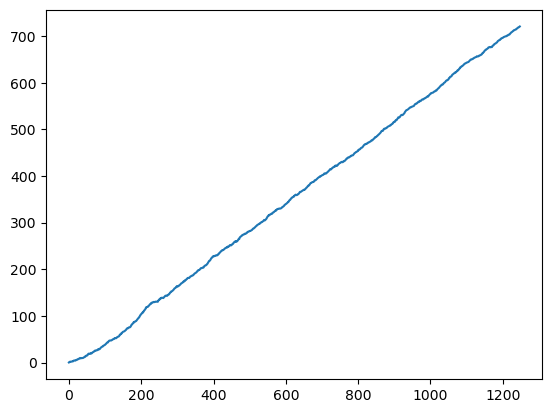

In [20]:
combinded_df.Cum_Regret.plot()